In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)


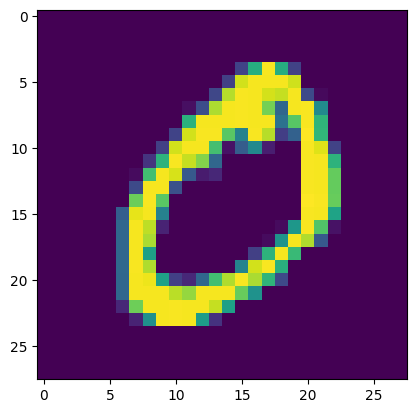

In [ ]:
print(type(x_train))
print(type(y_train))
print((x_train.shape))
print((y_train.shape))
print((x_test.shape))
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_train[1,:])

In [ ]:
x_train = x_train.reshape(60000, -1)
x_test = x_test.reshape(10000, -1)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 784)
(60000,)
(10000, 784)


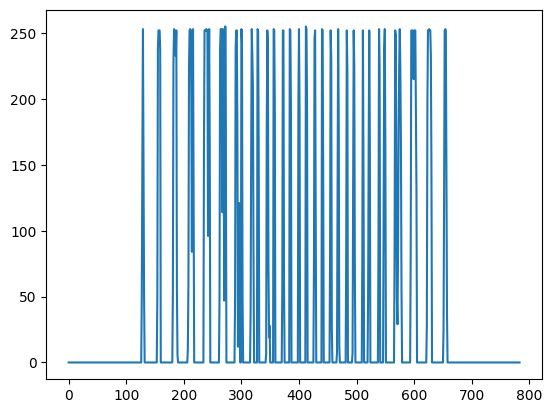

In [ ]:
print(type(x_train))
print(type(y_train))
print((x_train.shape))
print((y_train.shape))
print((x_test.shape))
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x_train[1,:])

In [ ]:
QUIEROMINMAX=True
if QUIEROMINMAX:
  from  sklearn.preprocessing import MinMaxScaler
  scaleminmax = MinMaxScaler()
  scaleminmax.fit(x_train)
  x_train=scaleminmax.transform(x_train)
  x_test=scaleminmax.transform(x_test)
else:
  from  sklearn.preprocessing import StandardScaler
  scaleStandard = StandardScaler()
  scaleStandard.fit(x_train)
  x_train=scaleStandard.transform(x_train)
  x_test=scaleStandard.transform(x_test)

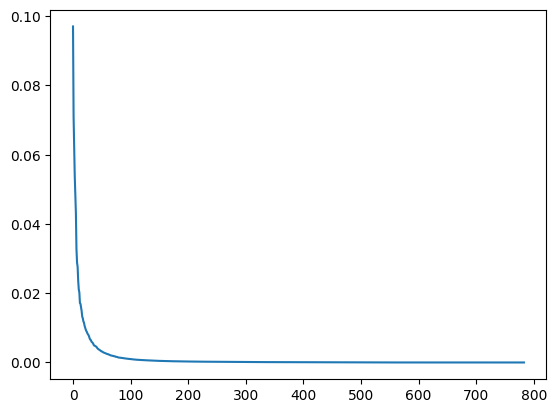

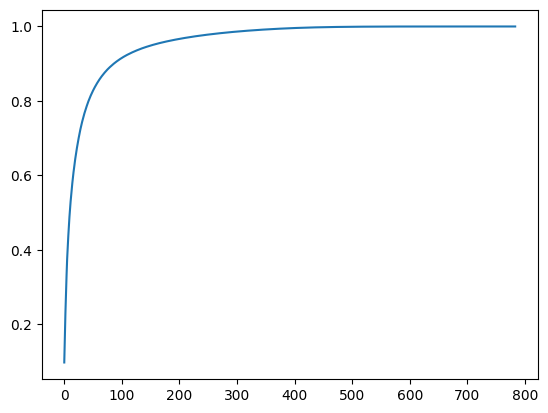

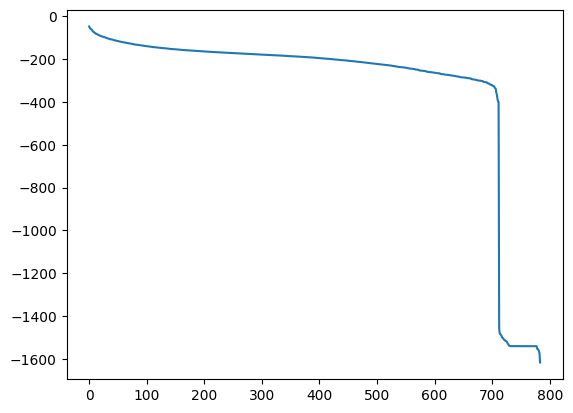

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

pca = PCA(n_components=784)
pca.fit(x_train)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.show()
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
plt.figure()
plt.plot(20*np.log((pca.explained_variance_ratio_)))
plt.show()




In [ ]:
componentes=179
print("con ", componentes, "componentes tenemos el ",np.cumsum(pca.explained_variance_ratio_)[componentes],"De la varianza explicada")


con  179 componentes tenemos el  0.9602272019627854 De la varianza explicada


In [ ]:

pca2 = PCA(n_components=componentes)
pca2.fit(x_train)
x_tr=pca2.transform(x_train)
x_te=pca2.transform(x_test)
print(x_tr.shape)
print(x_te.shape)

(60000, 179)
(10000, 179)


#MODELO SVM

In [ ]:
from sklearn.svm import SVC

svclinear=SVC( kernel='linear')
svclinear.fit(x_tr,y_train)
svcpoly=SVC(kernel = 'poly', degree=2)
svcpoly.fit(x_tr,y_train)
svcrbf=SVC(kernel = 'rbf')
svcrbf.fit(x_tr,y_train)

SVC()

In [ ]:
from sklearn.metrics import matthews_corrcoef
mcc_svm_linear=matthews_corrcoef(y_test,svclinear.predict(x_te))
mcc_svm_polinomial=matthews_corrcoef(y_test,svcpoly.predict(x_te))
mcc_svm_rbf=matthews_corrcoef(y_test,svcrbf.predict(x_te))
print("el MCC de SVM linear es: ",mcc_svm_linear)
print("el MCC de SVM polinomial es: ",mcc_svm_polinomial)
print("el MCC de SVM rbf es: ",mcc_svm_rbf)

el MCC de SVM linear es:  0.9382153133598655
el MCC de SVM polinomial es:  0.9807708223017746
el MCC de SVM rbf es:  0.9811050565098552


#Modelo KNN

([<matplotlib.axis.XTick at 0x7852f8787100>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

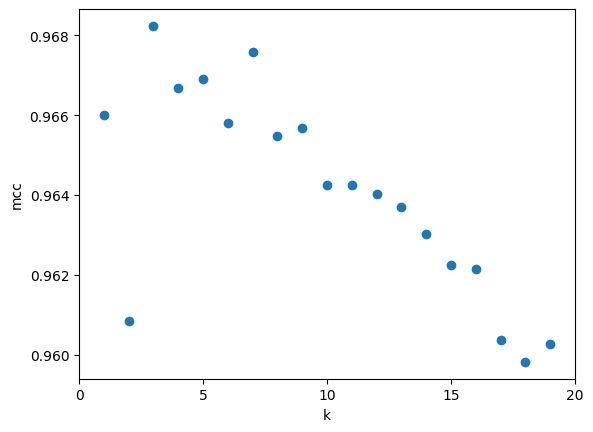

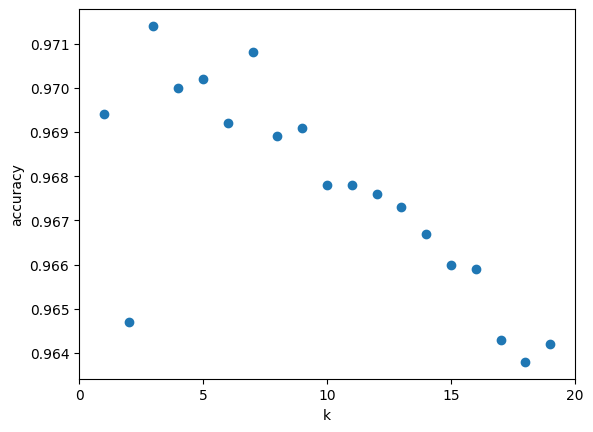

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef
distance='minkowski'
k_range = range(1, 20)
mcc_uniform = []
acc_uniform = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k,weights='uniform',metric=distance)
    knn.fit(x_tr, y_train)
    mcc_uniform.append(matthews_corrcoef(y_test,knn.predict(x_te)))
    acc_uniform.append(knn.score(x_te, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('mcc')
plt.scatter(k_range, mcc_uniform)
plt.xticks([0,5,10,15,20])
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, acc_uniform)
plt.xticks([0,5,10,15,20])

In [ ]:
print('Los mcc son:',mcc_uniform)
print('Las accuracies son:',acc_uniform)

Los mcc son: [0.9659991776740882, 0.9608383576764771, 0.9682383184051939, 0.9666923030016558, 0.9669052472358759, 0.9658030082648738, 0.9675734131252762, 0.9654690947829465, 0.965686879759804, 0.9642457580965844, 0.9642458864748343, 0.9640267401170048, 0.9636920565674445, 0.9630295193680583, 0.962254847569007, 0.9621420360421983, 0.9603676502262978, 0.9598145611344384, 0.9602564781165859]
Las accuracies son: [0.9694, 0.9647, 0.9714, 0.97, 0.9702, 0.9692, 0.9708, 0.9689, 0.9691, 0.9678, 0.9678, 0.9676, 0.9673, 0.9667, 0.966, 0.9659, 0.9643, 0.9638, 0.9642]


([<matplotlib.axis.XTick at 0x7852f7d9f580>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

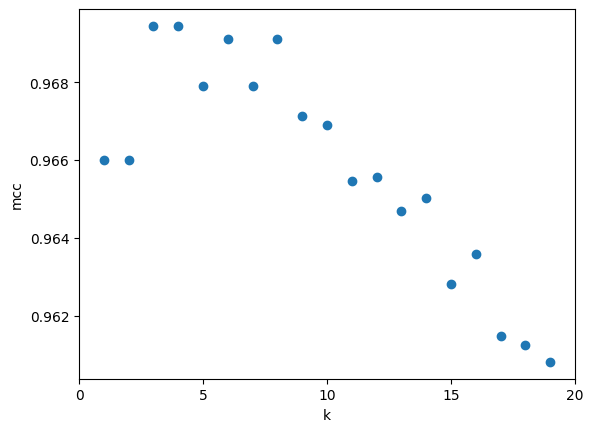

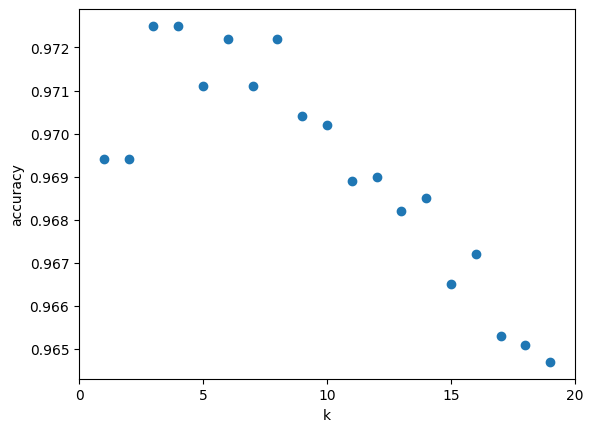

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef
distance='minkowski'
k_range = range(1, 20)
mcc_distance = []
acc_distance = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k,weights='distance',metric=distance)
    knn.fit(x_tr, y_train)
    mcc_distance.append(matthews_corrcoef(y_test,knn.predict(x_te)))
    acc_distance.append(knn.score(x_te, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('mcc')
plt.scatter(k_range, mcc_distance)
plt.xticks([0,5,10,15,20])
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, acc_distance)
plt.xticks([0,5,10,15,20])

In [ ]:
print('Los mcc son:',mcc_distance)
print('Las accuracies son:',acc_distance)

Los mcc son: [0.9659991776740882, 0.9659991776740882, 0.9694506905360328, 0.969449733473965, 0.9678992862320528, 0.9691203277708481, 0.9679000624615898, 0.9691228460109101, 0.9671260079159857, 0.9669048843569874, 0.965463773697273, 0.9655729625096978, 0.9646862537470592, 0.9650195729483421, 0.9628056645476968, 0.9635810264070319, 0.9614739755536555, 0.9612532182473352, 0.9608099440117814]
Las accuracies son: [0.9694, 0.9694, 0.9725, 0.9725, 0.9711, 0.9722, 0.9711, 0.9722, 0.9704, 0.9702, 0.9689, 0.969, 0.9682, 0.9685, 0.9665, 0.9672, 0.9653, 0.9651, 0.9647]


#Modelo LR

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
short_x_train, X_not_used, short_y_train, y_not_used = train_test_split(x_tr, y_train, test_size=0.7, random_state=17)
print("tamaño caracteristicas entrenamiento original",x_tr.shape)
print("tamaño etiquetas entrenamiento original",y_train.shape)
print("tamaño caracteristicas entrenamiento recortado",short_x_train.shape)
print("tamaño etiquetas entrenamiento recortado",short_y_train.shape)
poli=PolynomialFeatures(degree=2, interaction_only=False, include_bias=True, order='C')
Xpoli=poli.fit_transform(short_x_train)
print("tamaño entrenamiento polinomial recortado",Xpoli.shape)

tamaño caracteristicas entrenamiento original (60000, 179)
tamaño etiquetas entrenamiento original (60000,)
tamaño caracteristicas entrenamiento recortado (18000, 179)
tamaño etiquetas entrenamiento recortado (18000,)
tamaño entrenamiento polinomial recortado (18000, 16290)


In [ ]:
Xpoli_test=poli.fit_transform(x_te)
print(x_te.shape)
print(Xpoli_test.shape)

(10000, 179)
(10000, 16290)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef
lr=LogisticRegression(random_state=17, max_iter=1000)
lr.fit(x_tr,y_train)
mcc_lr=matthews_corrcoef(y_test,lr.predict(x_te))
print("El mcc del lr sin recortar con entrada no polinomial es:",mcc_lr)

El mcc del lr sin recortar con entrada no polinomial es: 0.9166454234586411


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef
lr=LogisticRegression(random_state=17, max_iter=1000)
lr.fit(short_x_train,short_y_train)
mcc_lr=matthews_corrcoef(y_test,lr.predict(x_te))
print("El mcc del lr recortado con entrada no polinomial es:",mcc_lr)

El mcc del lr recortado con entrada no polinomial es: 0.908537002993289


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef
lr=LogisticRegression(random_state=17, max_iter=1000)
lr.fit(Xpoli,short_y_train)
mcc_lr=matthews_corrcoef(y_test,lr.predict(Xpoli_test))
print("El mcc del lr con entrada polinomial es:",mcc_lr)

El mcc del lr con entrada polinomial es: 0.9759938119887203
